In [1]:
# Importing necessary libraries

# Numerical and matrix operations
import numpy as np  # NumPy is used for numerical computations and handling arrays.
import pandas as pd  # Pandas is used for data manipulation and analysis, particularly for dataframes.

# Data visualization
from matplotlib import pyplot as plt  # Matplotlib is used for creating static, interactive, and animated visualizations.
import seaborn as sns  # Seaborn is built on top of Matplotlib and provides a high-level interface for drawing attractive statistical graphics.

#Statistical modeling and machine learning
from sklearn.model_selection import train_test_split  # Scikit-learn is used for splitting data into training and testing sets.
from sklearn.preprocessing import StandardScaler, LabelEncoder  # Scikit-learn is used for feature scaling.
from sklearn.linear_model import LinearRegression  # Scikit-learn is used for linear regression modeling.
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # Scikit-learn is used for evaluating the performance of models.
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


import joblib

# Deep learning
import tensorflow as tf  # TensorFlow is used for deep learning and neural networks.
from tensorflow import keras  # Keras, which comes bundled


In [2]:
#retrieving the csv file
data = pd.read_csv('card_data.csv')

In [3]:
#Data Frame
df = pd.DataFrame(data)

In [52]:
df

,Date Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount Withdrawn,Class
0,07/06/2024 11:00:44,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,F
1,07062024 11:01:43,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,F
2,07/06/2024 11:02:05,NaN,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,F
3,07062024 11:02:21,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,F
4,07/06/2024 11:03:13,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,10/07/2024 11:21:44,1.239173,0.103368,0.371711,0.440033,-0.370396,-0.509393,-0.129165,0.030558,-0.010578,...,-0.240934,-0.790563,0.097823,-0.034851,0.190347,0.101428,-0.041183,0.002979,1.98,M
505,10/07/2024 11:22:21,-0.409900,1.183088,1.598967,0.353088,0.309710,-0.312400,0.707197,-0.043206,-0.892869,...,-0.163371,-0.396155,-0.069498,0.069735,-0.298407,0.199188,0.099692,0.118617,1.98,M
506,10/07/2024 11:24:01,1.240600,0.747735,-0.214136,1.301475,0.124740,-1.172183,0.371059,-0.306401,-0.246672,...,-0.039413,0.010700,-0.132261,0.306805,0.728251,-0.331239,0.039024,0.053600,1.00,F
507,10/07/2024 11:24:45,0.953918,-0.760595,1.091611,0.147115,-0.729796,1.430148,-1.070470,0.727965,1.432734,...,-0.098744,-0.015598,0.248461,-0.596979,-0.291046,1.053935,0.021906,0.003337,32.63,F


In [53]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount Withdrawn
count,505.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,505.000000,...,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000
mean,-0.147504,0.190540,0.863139,0.373890,0.026603,0.244175,0.104562,-0.044754,-0.013303,0.059720,...,0.047686,-0.007733,-0.108614,-0.031656,0.009900,0.131261,0.008315,0.019217,-0.018080,88.269037
std,1.361457,1.232291,1.040525,1.245675,1.186909,1.297989,0.856110,0.819954,0.861278,0.955978,...,0.614876,0.560787,0.617631,0.379144,0.640129,0.425208,0.465133,0.329490,0.293336,490.379065
min,-6.093248,-12.114213,-5.694973,-4.515824,-6.631951,-3.498447,-4.925568,-7.494658,-2.517037,-2.311024,...,-2.538941,-4.134608,-2.776923,-3.553381,-1.867208,-1.389079,-1.243924,-2.377933,-2.733887,0.000000
25%,-0.895224,-0.169044,0.302488,-0.363736,-0.568699,-0.584580,-0.303337,-0.159596,-0.478856,-0.366167,...,-0.165241,-0.224926,-0.534738,-0.163747,-0.384842,-0.136578,-0.315949,-0.041732,-0.013592,5.990000
50%,-0.342871,0.269139,0.878730,0.510525,-0.092210,-0.027353,0.103677,0.053143,-0.053466,-0.081320,...,-0.033831,-0.071473,-0.069830,-0.045124,0.104744,0.155102,-0.051634,0.021491,0.022966,17.800000
75%,1.114009,0.865268,1.513242,1.159432,0.480561,0.528598,0.554393,0.276524,0.392478,0.267392,...,0.146140,0.093118,0.313610,0.084311,0.431806,0.444578,0.226700,0.106580,0.085802,59.990000
max,1.586093,5.267376,3.772857,4.075817,7.672544,5.122103,4.808426,1.726413,5.436633,8.737458,...,7.744222,4.332858,1.461535,3.150413,1.215279,1.136720,3.065576,2.490503,1.575380,10000.000000


In [6]:
########################################################################

In [7]:
#CLEANING THE DATA

In [8]:
# checking for missing values 
data.isnull().sum()

Date Time           0
V1                  4
V2                  0
V3                  0
V4                  0
V5                  0
V6                  0
V7                  0
V8                  0
V9                  0
V10                 4
V11                 0
V12                 0
V13                 0
V14                 0
V15                 0
V16                 0
V17                 0
V18                 0
V19                 0
V20                 0
V21                 0
V22                 0
V23                 0
V24                 0
V25                 0
V26                 0
V27                 0
V28                 0
Amount Withdrawn    0
Class               0
dtype: int64

In [9]:

# Calculate the number of missing values per column
missing_values = data.isnull().sum()

# Calculate the total number of values per column
total_values = data.shape[0]

# Calculate the percentage of missing values
missing_percentage = (missing_values / total_values) * 100

# Display the percentage of missing values
print("Percentage of missing data for each feature:")
print(missing_percentage)


Percentage of missing data for each feature:
Date Time           0.000000
V1                  0.785855
V2                  0.000000
V3                  0.000000
V4                  0.000000
V5                  0.000000
V6                  0.000000
V7                  0.000000
V8                  0.000000
V9                  0.000000
V10                 0.785855
V11                 0.000000
V12                 0.000000
V13                 0.000000
V14                 0.000000
V15                 0.000000
V16                 0.000000
V17                 0.000000
V18                 0.000000
V19                 0.000000
V20                 0.000000
V21                 0.000000
V22                 0.000000
V23                 0.000000
V24                 0.000000
V25                 0.000000
V26                 0.000000
V27                 0.000000
V28                 0.000000
Amount Withdrawn    0.000000
Class               0.000000
dtype: float64


In [10]:
#Filling the missing values in column V1 and V10 with their respective mean values

data = data.copy() #creating a copy of the object referencing to original object
data.loc[:, 'V1'] = data['V1'].fillna(data['V1'].mean())
data.loc[:, 'V10'] = data['V10'].fillna(data['V10'].mean())
#we used data.loc[:, 'col'] to explicitly select a column and modify it
#which avoids problems brought about by chained assignments (unexpected behavior)

In [11]:
# Verifying if missing values are handled
missing_values_after = data.isnull().sum()
print(missing_values_after)

Date Time           0
V1                  0
V2                  0
V3                  0
V4                  0
V5                  0
V6                  0
V7                  0
V8                  0
V9                  0
V10                 0
V11                 0
V12                 0
V13                 0
V14                 0
V15                 0
V16                 0
V17                 0
V18                 0
V19                 0
V20                 0
V21                 0
V22                 0
V23                 0
V24                 0
V25                 0
V26                 0
V27                 0
V28                 0
Amount Withdrawn    0
Class               0
dtype: int64


In [12]:
#checking for duplicate rows
duplicates = data.duplicated(keep=False)
data[duplicates]

,Date Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount Withdrawn,Class
499,10/07/2024 11:21:44,1.239173,0.103368,0.371711,0.440033,-0.370396,-0.509393,-0.129165,0.030558,-0.010578,...,-0.240934,-0.790563,0.097823,-0.034851,0.190347,0.101428,-0.041183,0.002979,1.98,M
500,10/07/2024 11:22:21,-0.409900,1.183088,1.598967,0.353088,0.309710,-0.312400,0.707197,-0.043206,-0.892869,...,-0.163371,-0.396155,-0.069498,0.069735,-0.298407,0.199188,0.099692,0.118617,1.98,M
501,10/07/2024 11:24:01,1.240600,0.747735,-0.214136,1.301475,0.124740,-1.172183,0.371059,-0.306401,-0.246672,...,-0.039413,0.010700,-0.132261,0.306805,0.728251,-0.331239,0.039024,0.053600,1.00,F
502,10/07/2024 11:24:45,0.953918,-0.760595,1.091611,0.147115,-0.729796,1.430148,-1.070470,0.727965,1.432734,...,-0.098744,-0.015598,0.248461,-0.596979,-0.291046,1.053935,0.021906,0.003337,32.63,F
503,10/07/2024 11:31:21,1.255729,0.297650,0.287526,0.699902,-0.438405,-1.088542,0.034421,-0.159596,0.149990,...,-0.296736,-0.894374,0.137806,0.318641,0.190562,0.097319,-0.028174,0.029141,1.98,F
504,10/07/2024 11:21:44,1.239173,0.103368,0.371711,0.440033,-0.370396,-0.509393,-0.129165,0.030558,-0.010578,...,-0.240934,-0.790563,0.097823,-0.034851,0.190347,0.101428,-0.041183,0.002979,1.98,M
505,10/07/2024 11:22:21,-0.409900,1.183088,1.598967,0.353088,0.309710,-0.312400,0.707197,-0.043206,-0.892869,...,-0.163371,-0.396155,-0.069498,0.069735,-0.298407,0.199188,0.099692,0.118617,1.98,M
506,10/07/2024 11:24:01,1.240600,0.747735,-0.214136,1.301475,0.124740,-1.172183,0.371059,-0.306401,-0.246672,...,-0.039413,0.010700,-0.132261,0.306805,0.728251,-0.331239,0.039024,0.053600,1.00,F
507,10/07/2024 11:24:45,0.953918,-0.760595,1.091611,0.147115,-0.729796,1.430148,-1.070470,0.727965,1.432734,...,-0.098744,-0.015598,0.248461,-0.596979,-0.291046,1.053935,0.021906,0.003337,32.63,F
508,10/07/2024 11:31:21,1.255729,0.297650,0.287526,0.699902,-0.438405,-1.088542,0.034421,-0.159596,0.149990,...,-0.296736,-0.894374,0.137806,0.318641,0.190562,0.097319,-0.028174,0.029141,1.98,F


In [13]:
#removing duplicate values while keeping the occurrence
data = data.drop_duplicates()
#To remove all duplicates including the first, we use this. but that shall make us loose data
#data_cleaned = data[~data.duplicated(keep=False)]


In [14]:

#confirming that there are no duplicate rows
duplicates = data.duplicated(keep=False)
data[duplicates]


,Date Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount Withdrawn,Class


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date Time         509 non-null    object 
 1   V1                505 non-null    float64
 2   V2                509 non-null    float64
 3   V3                509 non-null    float64
 4   V4                509 non-null    float64
 5   V5                509 non-null    float64
 6   V6                509 non-null    float64
 7   V7                509 non-null    float64
 8   V8                509 non-null    float64
 9   V9                509 non-null    float64
 10  V10               505 non-null    float64
 11  V11               509 non-null    float64
 12  V12               509 non-null    float64
 13  V13               509 non-null    float64
 14  V14               509 non-null    float64
 15  V15               509 non-null    float64
 16  V16               509 non-null    float64
 1

In [16]:
# Function to standardize date format
import re
def standardize_date(date_str):
    # Match and reformat dates of format 'DDMMYYYY HH:MM:SS'
    match = re.match(r'(\d{2})(\d{2})(\d{4}) (\d{2}):(\d{2}):(\d{2})', date_str)
    if match:
        return f'{match.group(1)}/{match.group(2)}/{match.group(3)} {match.group(4)}:{match.group(5)}:{match.group(6)}'
    return date_str

# Apply the function to standardize the 'Date Time' column
df['Date Time'] = df['Date Time'].apply(standardize_date)


In [17]:


# Convert 'Date Time' column to datetime
df['Date Time'] = pd.to_datetime(df['Date Time'], format='%d/%m/%Y %H:%M:%S', errors='coerce')

# Handle NaT values by interpolation
df['Date Time'] = df['Date Time'].interpolate()

In [18]:
df['Date Time']

0     2024-06-07 11:00:44
1     2024-06-07 11:01:43
2     2024-06-07 11:02:05
3     2024-06-07 11:02:21
4     2024-06-07 11:03:13
              ...        
504   2024-07-10 11:21:44
505   2024-07-10 11:22:21
506   2024-07-10 11:24:01
507   2024-07-10 11:24:45
508   2024-07-10 11:31:21
Name: Date Time, Length: 509, dtype: datetime64[ns]

In [19]:
#####################################################################################################

In [20]:
#DATA VISUALIZATION

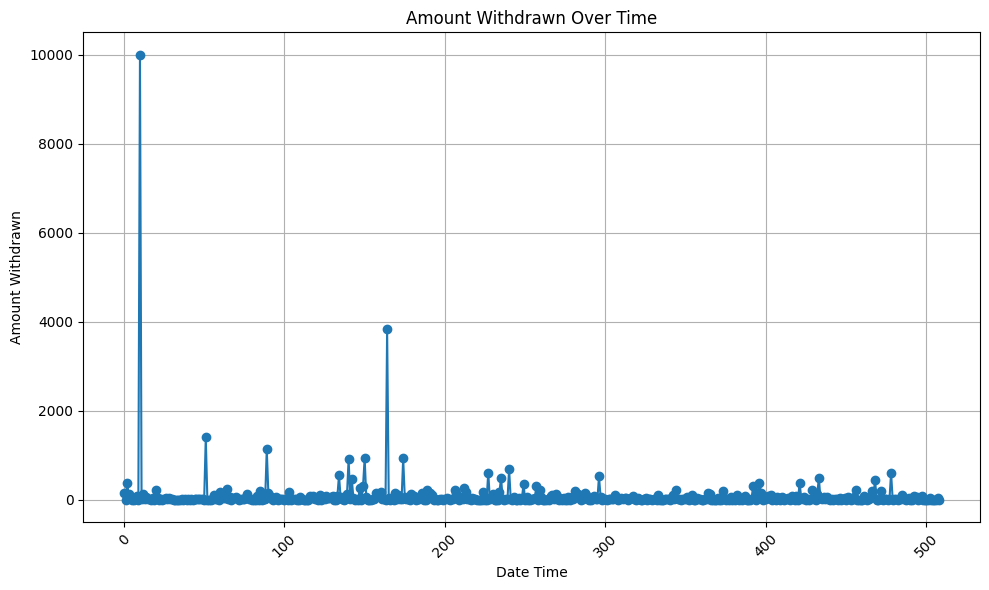

In [21]:
# Line plot
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Amount Withdrawn'], marker='o', linestyle='-')
plt.title('Amount Withdrawn Over Time')
plt.xlabel('Date Time')
plt.ylabel('Amount Withdrawn')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Amount Withdrawn Over Time')

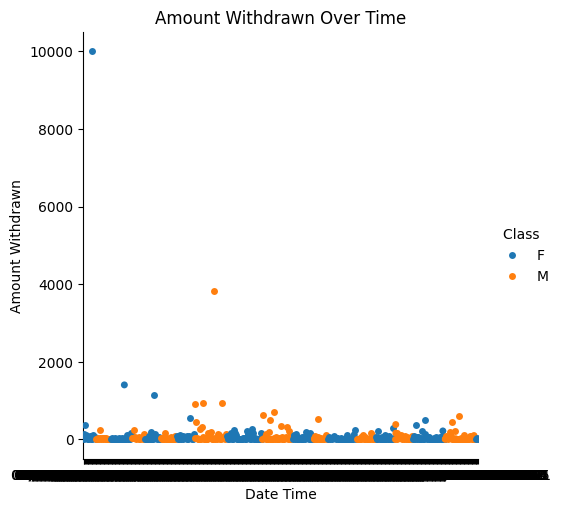

In [22]:
#Categorical plot using seaborn
sns.catplot(y='Amount Withdrawn', x="Date Time",hue="Class ", data=data)
plt.title('Amount Withdrawn Over Time')

In [23]:
# Remove non-numeric columns
data = df.select_dtypes(include=[float, int])

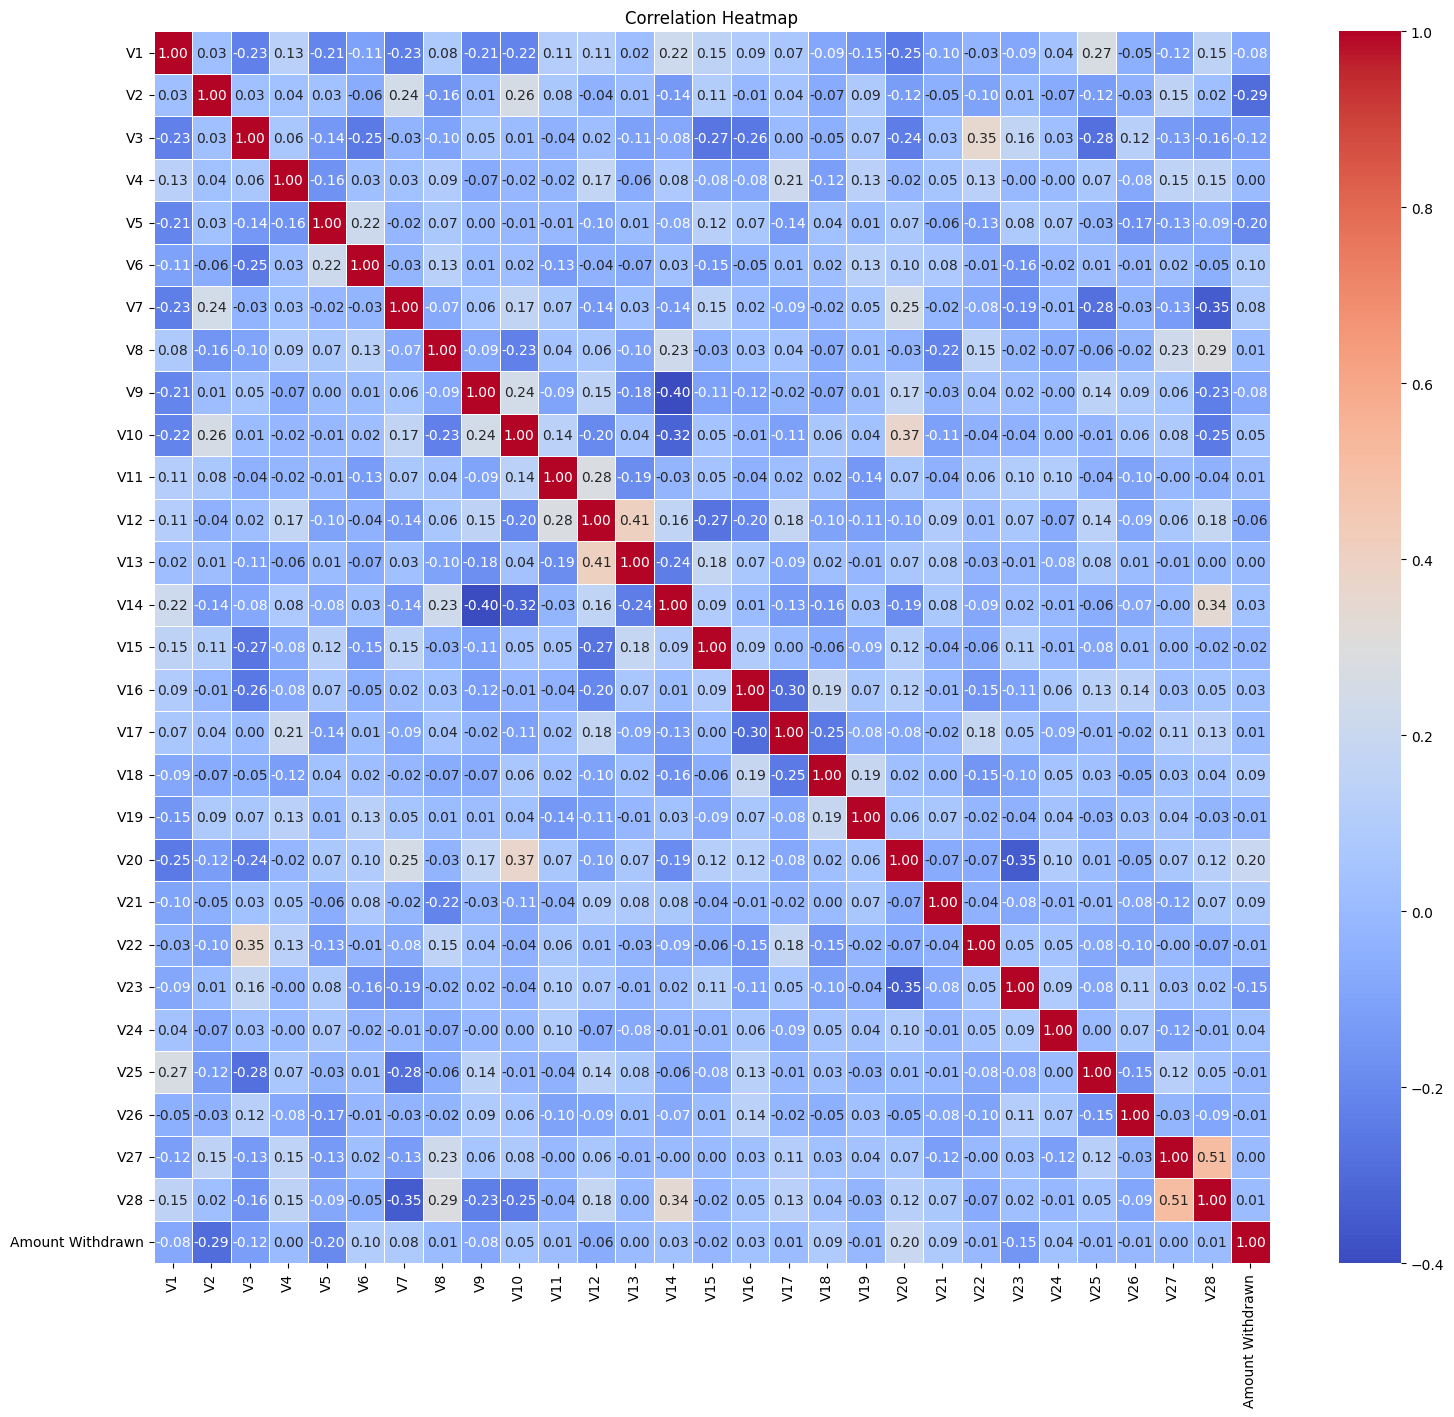

In [24]:
#correlation heatmap
plt.figure(figsize=(18,16))
corr = data.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Text(0.5, 0.92, '3D Plot of Amount Withdrawn Over Time')

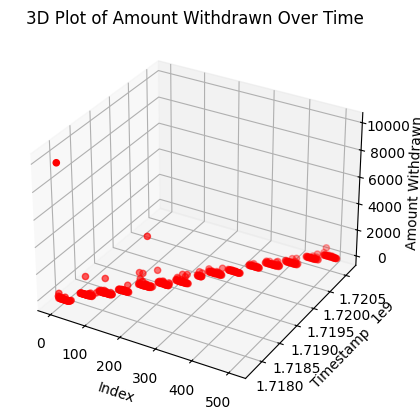

In [25]:

from mpl_toolkits.mplot3d import Axes3D
# Convert 'Date Time' column to datetime
df['Date Time'] = pd.to_datetime(df['Date Time'])

# Convert 'Date Time' to a numerical format (e.g., timestamp)
df['Timestamp'] = df['Date Time'].apply(lambda x: x.timestamp())

# Add a sequential identifier column
df['Index'] = df.index

# Ensure 'Amount Withdrawn' is numerical
df['Amount Withdrawn'] = pd.to_numeric(df['Amount Withdrawn'])

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot using numerical 'Timestamp' for the time axis
ax.scatter(df['Index'], df['Timestamp'], df['Amount Withdrawn'], c='r', marker='o')

# Setting labels
ax.set_xlabel('Index')
ax.set_ylabel('Timestamp')
ax.set_zlabel('Amount Withdrawn')
ax.set_title('3D Plot of Amount Withdrawn Over Time')


In [26]:
###################################################################################3

In [27]:
#LOGISTIC REGRESSION

In [28]:
dat = pd.read_csv('card_data.csv')

In [29]:
df = pd.DataFrame(dat)

In [30]:
fraud = dat.loc[dat['Class '] == 'F']
normal = dat.loc[dat['Class '] == 'M']

In [31]:
len(fraud)

266

In [32]:
len(normal)

243

In [33]:
#Filling the missing values in column V1 and V10 with their respective mean values

dat = dat.copy() #creating a copy of the object referencing to original object
dat.loc[:, 'V1'] = dat['V1'].fillna(dat['V1'].mean())
dat.loc[:, 'V10'] = dat['V10'].fillna(dat['V10'].mean())
#we used data.loc[:, 'col'] to explicitly select a column and modify it
#which avoids problems brought about by chained assignments (unexpected behavior)

In [34]:
# Remove non-numeric columns
# df = df.select_dtypes(include=[float, int])
dat = dat.drop(columns=['Date Time']) 

In [35]:
# Extract features and target
X = dat.iloc[:, :-1]  # all columns except the last one
y = dat['Class ']   # the last column

In [36]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [37]:
clf = linear_model.LogisticRegression(C=1e5)

In [38]:
clf.fit(x_train, y_train)

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=100000.0)

In [39]:
y_pred = np.array(clf.predict(x_test))
y = np.array(y_test)

In [40]:
print(confusion_matrix(y_test, y_pred))

[[33 18]
 [25 26]]


In [41]:
print(accuracy_score(y_test, y_pred))

0.5784313725490197


In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           F       0.57      0.65      0.61        51
           M       0.59      0.51      0.55        51

    accuracy                           0.58       102
   macro avg       0.58      0.58      0.58       102
weighted avg       0.58      0.58      0.58       102



In [43]:

#REGRESSION METRICS







In [44]:
df_stand = pd.read_csv('card_data.csv')
#df_stand
#df_stand.columns
# df.dtypes
# # Remove non-numeric columns
# # df = df.select_dtypes(include=[float, int])
# df_stand = df_stand.drop(columns=['Date Time','Class ']) 

In [45]:
# Remove non-numeric columns
# df = df.select_dtypes(include=[float, int])
df_stand = df_stand.drop(columns=['Date Time']) 

In [46]:
# Extract features and target
X = df_stand.iloc[:, :-1]  # all columns except the last one
y = df_stand['Class ']   # the last column

In [47]:
 #Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
# Print the unique values to inspect the data
print(y_train.unique())

['F' 'M']


In [49]:

# If 'F' or any other non-numeric values are present, you can convert them to numeric values if appropriate
# For example, if 'F' should be 0 and 'M' should be 1
y_train = y_train.replace({'F': 0, 'M': 1})

# Ensure y_test and y_pred have the same length
if len(y_test) != len(y_pred):
    raise ValueError("Length of y_test and y_pred must be the same.")

# Handle downcasting explicitly
y_train = y_train.infer_objects(copy=False)

# Ensure y_train is now numeric
y_train = y_train.astype(float)
# Now fit the model

#Train a RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)





#The y_test contains categorical data. it is not suitable for regression model

C:\Users\hp\AppData\Local\Temp\ipykernel_23360\3286488536.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train = y_train.replace({'F': 0, 'M': 1})


RandomForestRegressor(random_state=42)

In [50]:
print("y_test unique values:", y_test.unique())
print("y_pred unique values:", np.unique(y_pred))


y_test unique values: ['F' 'M']
y_pred unique values: ['F' 'M']


In [51]:
import pandas as pd

# Assuming y_test is a pandas Series
# Replace non-numeric values with NaN and then drop them
y_test = pd.to_numeric(y_test, errors='coerce')
y_test = y_test.dropna()

# Ensure y_pred is also numeric
y_pred = np.array(y_pred, dtype=float)

# Make sure y_pred has the same length as y_test after dropping NaN
if len(y_test) != len(y_pred):
    raise ValueError("Length of y_test and y_pred must be the same after cleaning.")


ValueError: could not convert string to float: 'M'

In [ ]:
# Make predictions
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Evaluate the model using regression metrics
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R-squared (R2):", r2_score(y_test, y_pred))

In [ ]:
# Save the model and scaler for future use
joblib.dump(regressor, 'regressor_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

In [ ]:
# Convert categorical values in y_train and y_test to numeric if necessary
y_train = y_train.replace({'F': 0, 'M': 1})
y_test = y_test.replace({'F': 0, 'M': 1})


In [ ]:
# Initialize the RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
classifier.fit(X_train, y_train)


In [ ]:
# Make predictions
y_pred = classifier.predict(X_test)

# Check if y_pred is empty
print("y_pred:", y_pred)
print("Length of y_pred:", len(y_pred))



In [ ]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


In [ ]:
# Ensure X_test is not empty
if X_test.shape[0] > 0:
    y_pred = classifier.predict(X_test)
    print("Length of y_pred:", len(y_pred))
else:
    print("X_test is empty. Check the test data preparation.")

# Check length and compute metrics if lengths match
if len(y_test) == len(y_pred):
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
else:
    print("Mismatch in lengths of y_test and y_pred.")


In [ ]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
